## NAME - Suhani Gahukar
## PRN - 22070521084

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    "Year": [2023, 2023, 2023, 2024, 2024, 2024],
    "Quarter": ["Q1", "Q2", "Q3", "Q1", "Q2", "Q3"],
    "Region": ["North America", "North America", "Europe", "Europe", "Asia", "Asia"],
    "Country": ["USA", "Canada", "UK", "Germany", "India", "China"],
    "Category": ["Electronics", "Clothing", "Electronics", "Clothing", "Electronics", "Clothing"],
    "Product Name": ["Laptop", "T-Shirt", "Smartphone", "Jacket", "Tablet", "Shoes"],
    "Sales": [10000, 7000, 15000, 9000, 11000, 8000]
}

In [3]:
df = pd.DataFrame(data)
print("Original Data:")
print(df)

Original Data:
   Year Quarter         Region  Country     Category Product Name  Sales
0  2023      Q1  North America      USA  Electronics       Laptop  10000
1  2023      Q2  North America   Canada     Clothing      T-Shirt   7000
2  2023      Q3         Europe       UK  Electronics   Smartphone  15000
3  2024      Q1         Europe  Germany     Clothing       Jacket   9000
4  2024      Q2           Asia    India  Electronics       Tablet  11000
5  2024      Q3           Asia    China     Clothing        Shoes   8000


In [4]:
#Part 3:
# 1. Roll-Up (Aggregate Sales by Year)
rollup_df = df.groupby("Year")["Sales"].sum().reset_index()
print("\nRoll-Up (Aggregate Sales by Year):")
print(rollup_df)


Roll-Up (Aggregate Sales by Year):
   Year  Sales
0  2023  32000
1  2024  28000


In [5]:
# 2. Drill-Down (Sales by Year and Quarter)
drilldown_df = df.groupby(["Year", "Quarter"])["Sales"].sum().reset_index()
print("\nDrill-Down (Sales by Year and Quarter):")
print(drilldown_df)


Drill-Down (Sales by Year and Quarter):
   Year Quarter  Sales
0  2023      Q1  10000
1  2023      Q2   7000
2  2023      Q3  15000
3  2024      Q1   9000
4  2024      Q2  11000
5  2024      Q3   8000


In [6]:
# 3. Slice (Data for Year 2023)
slice_df = df[df["Year"] == 2023]
print("\nSlice (Data for Year 2023):")
print(slice_df)


Slice (Data for Year 2023):
   Year Quarter         Region Country     Category Product Name  Sales
0  2023      Q1  North America     USA  Electronics       Laptop  10000
1  2023      Q2  North America  Canada     Clothing      T-Shirt   7000
2  2023      Q3         Europe      UK  Electronics   Smartphone  15000


In [7]:
# 4. Dice (Sales for Year 2023 and Region 'North America')
dice_df = df[(df["Year"] == 2023) & (df["Region"] == "North America")]
print("\nDice (Sales for Year 2023 and Region 'North America'):")
print(dice_df)


Dice (Sales for Year 2023 and Region 'North America'):
   Year Quarter         Region Country     Category Product Name  Sales
0  2023      Q1  North America     USA  Electronics       Laptop  10000
1  2023      Q2  North America  Canada     Clothing      T-Shirt   7000


In [8]:
#Part 3: Visualizing the Cube
pivot_table = df.pivot_table(values="Sales", index="Year", columns="Region", aggfunc="sum", fill_value=0)
print("\nPivot Table (Sales by Year and Region):")
print(pivot_table)


Pivot Table (Sales by Year and Region):
Region   Asia  Europe  North America
Year                                
2023        0   15000          17000
2024    19000    9000              0


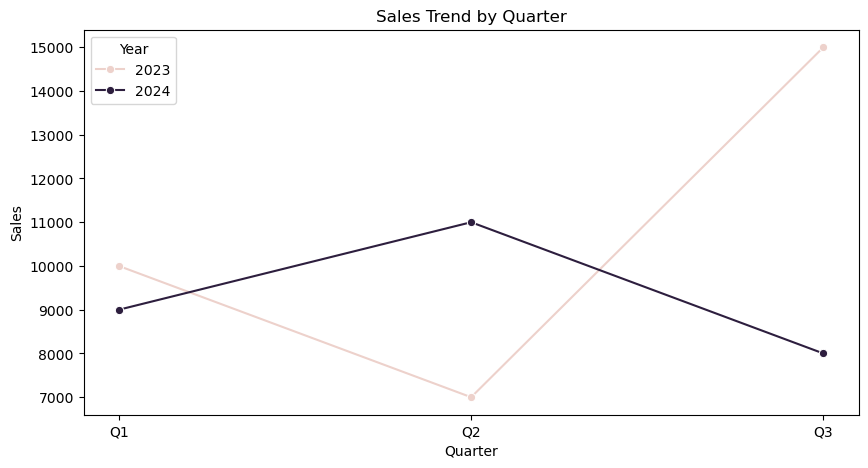

In [9]:
# Line Plot for Sales by Year and Quarter
plt.figure(figsize=(10, 5))
sns.lineplot(x="Quarter", y="Sales", hue="Year", data=drilldown_df, marker="o")
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.show()

C:\Users\gahuk\AppData\Local\Temp\ipykernel_22904\1789216699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="Sales", data=rollup_df, palette="viridis")


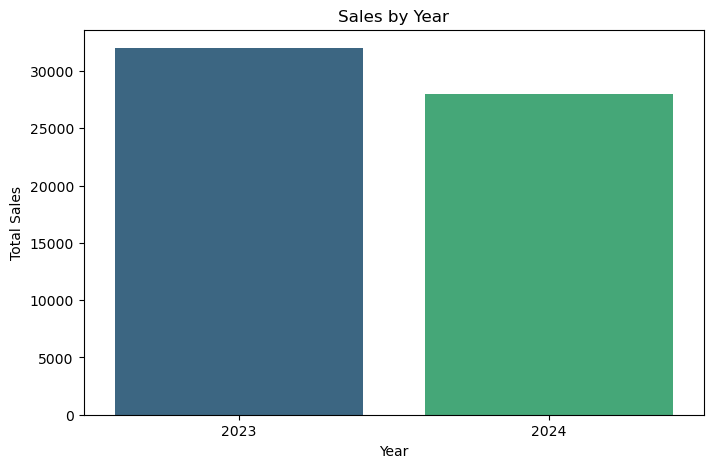

In [10]:
# Bar Plot for Sales by Year
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Sales", data=rollup_df, palette="viridis")
plt.title("Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()